<a href="https://colab.research.google.com/github/Elma-dev/House_Pricing_Model/blob/main/HousePracing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#csv : comma seperated values

In [115]:
test_data=pd.read_csv("test.csv")
data_train=pd.read_csv("train.csv")
target=pd.read_csv("sample_submission.csv")

In [8]:
test_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [9]:
target.tail()

,Id,SalePrice
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659
1458,2919,187741.866657


In [108]:
data_test=pd.merge(test_data,target,on="Id")
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


<AxesSubplot:ylabel='Frequency'>

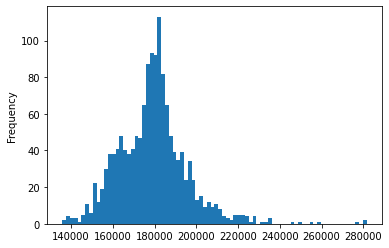

In [110]:
#SKEW PROBLEM
data_test.SalePrice.plot.hist(bins=80)


<AxesSubplot:>

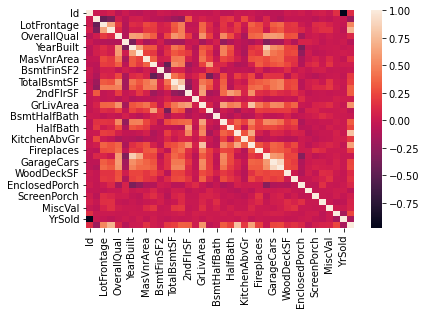

In [117]:
sns.heatmap(data_test.corr())

<AxesSubplot:xlabel='MSSubClass'>

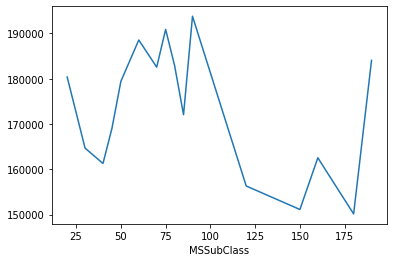

In [27]:
data_test.groupby("MSSubClass").SalePrice.mean().plot()

<AxesSubplot:xlabel='MSZoning'>

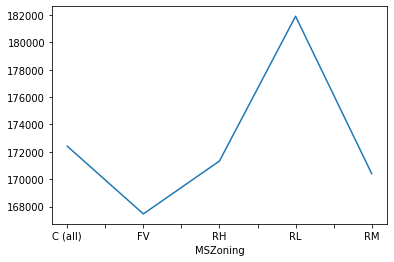

In [34]:
data_test.groupby(["MSZoning"]).SalePrice.mean().plot()
#where we have a house in RL zone : Residential Low Density the PriceSale is High


<AxesSubplot:xlabel='LotFrontage'>

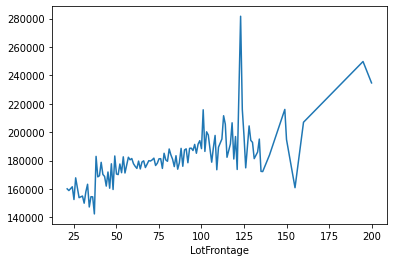

In [139]:
data_test.groupby(["LotFrontage"]).SalePrice.mean().plot()


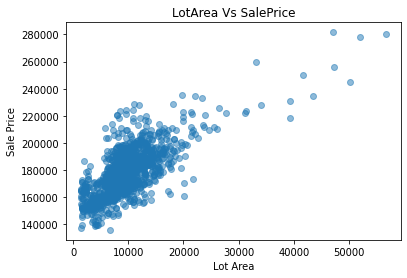

In [118]:
plt.scatter(data_test.LotArea,data_test.SalePrice,alpha=0.5)
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.title("LotArea Vs SalePrice")
plt.show()

In [55]:
data_test.groupby(["Street"]).SalePrice.mean().to_frame()

,SalePrice
Street,
Grvl,172891.797237
Pave,179209.900848


<AxesSubplot:xlabel='LotShape'>

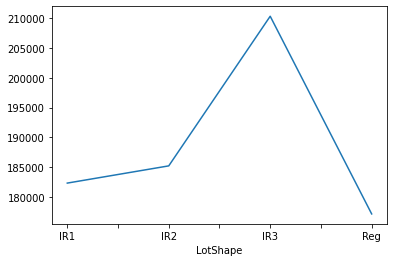

In [59]:
data_test.groupby(["LotShape"]).SalePrice.mean().plot()

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

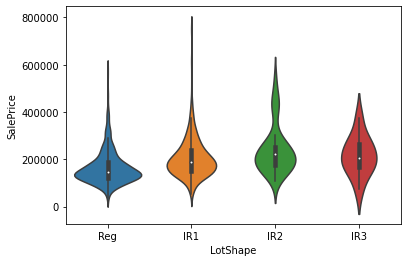

In [146]:
sns.violinplot(x="LotShape",y="SalePrice",data=data_train)


<AxesSubplot:xlabel='Neighborhood'>

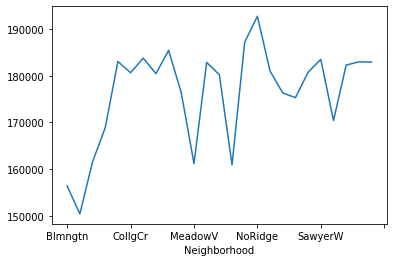

In [62]:
data_test.groupby(["Neighborhood"]).SalePrice.mean().plot()

In [68]:
data_test.groupby("BldgType").SalePrice.mean().to_frame()

,SalePrice
BldgType,
1Fam,181251.505943
2fmCon,184664.618968
Duplex,193804.551817
Twnhs,158203.626575
TwnhsE,158097.497383


<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

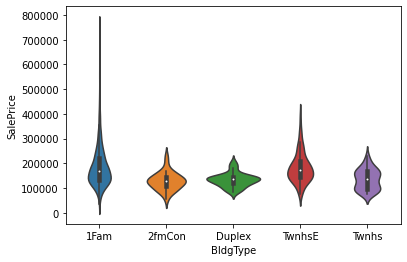

In [153]:
sns.violinplot(x="BldgType",y="SalePrice",data=data_train)

<AxesSubplot:xlabel='HouseStyle'>

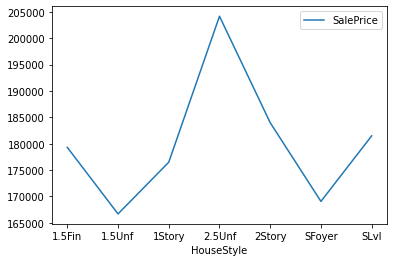

In [106]:
data_test.groupby("HouseStyle").SalePrice.mean().to_frame().plot()


In [78]:
data_test.groupby(["OverallQual","MSSubClass"]).SalePrice.mean().to_frame()


SalePrice
OverallQual MSSubClass               
1           20          198074.785172
2           20          155506.084143
            30          157033.831211
            50          154287.264376
            70          176041.882372
...                               ...
9           60          196346.018326
            120         161146.925334
10          20          182804.289030
            60          212451.975243
            160         151556.014030

[75 rows x 1 columns]

In [80]:
data_test.groupby(["OverallCond","MSSubClass"]).SalePrice.mean().to_frame()

SalePrice
OverallCond MSSubClass               
1           20          218676.768270
            50          185998.255166
            70          212997.829188
            90          183072.740591
2           20          193413.771195
...                               ...
9           30          166548.316850
            50          180041.646069
            60          192686.931748
            70          178032.362752
            160         161067.859767

[84 rows x 1 columns]

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

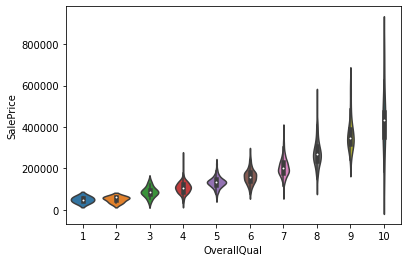

In [123]:
sns.violinplot(x="OverallQual",y="SalePrice",data=train_data)

In [159]:
yb_pr=data_test.groupby("YearBuilt").SalePrice.mean().to_frame().reset_index()
yb_pr.head()

,YearBuilt,SalePrice
0,1879,184522.369240
1,1880,225810.160292
2,1890,183283.942397
3,1895,178771.582137
4,1896,176825.940961


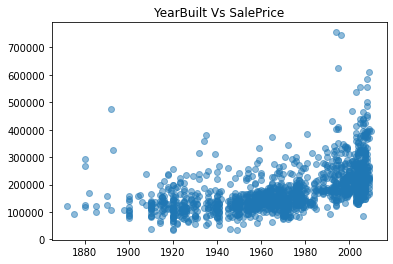

In [164]:
plt.scatter(data_train.YearBuilt,data_train.SalePrice,alpha=0.5)
plt.title("YearBuilt Vs SalePrice")
plt.show()

In [167]:
ktc_sp=data_test.groupby("KitchenQual").SalePrice.mean().to_frame().reset_index()
ktc_sp

,KitchenQual,SalePrice
0,Ex,184921.459567
1,Fa,175422.366088
2,Gd,178648.169233
3,TA,178947.416624


<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

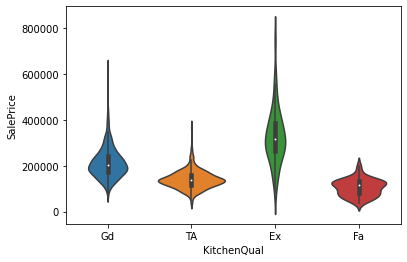

In [169]:
sns.violinplot(x="KitchenQual",y="SalePrice",data=data_train)


<AxesSubplot:xlabel='TotRmsAbvGrd'>

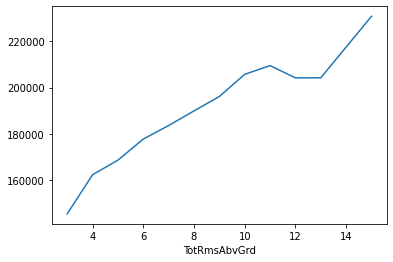

In [104]:
data_test.groupby("TotRmsAbvGrd").SalePrice.mean().plot()

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

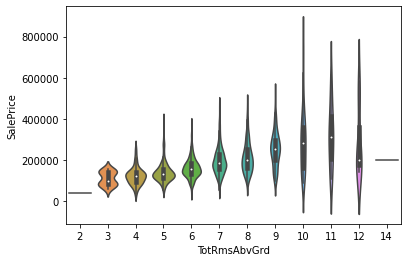

In [170]:
sns.violinplot(x="TotRmsAbvGrd",y="SalePrice",data=data_train)

In [171]:
data_test.groupby("GarageType").SalePrice.mean().to_frame().reset_index()

,GarageType,SalePrice
0,2Types,197833.187776
1,Attchd,179679.307957
2,Basment,171556.734551
3,BuiltIn,189212.066933
4,CarPort,172223.866745
5,Detchd,175477.642849


<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

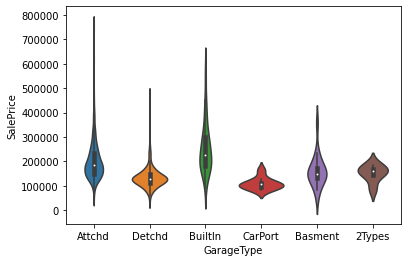

In [172]:
sns.violinplot(x="GarageType",y="SalePrice",data=data_train)

In [107]:
data_test.groupby("Utilities").SalePrice.mean().to_frame()

,SalePrice
Utilities,
AllPub,179158.509404


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

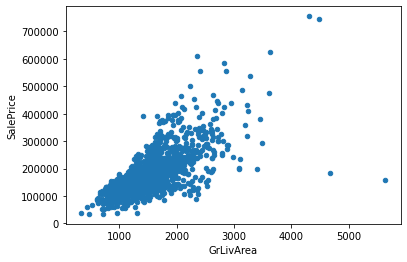

In [459]:
data_train.plot.scatter("GrLivArea","SalePrice")

#Preprocessing of Data

<AxesSubplot:ylabel='Frequency'>

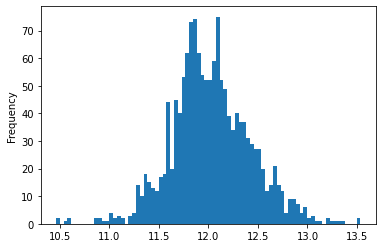

In [409]:
#Solving the SKEW Problem
data_train.SalePrice.apply(np.log1p).plot.hist(bins=80)

In [485]:
y=data_train.SalePrice.apply(np.log1p)

In [484]:
x=data_train[["MSZoning","LotFrontage","LotArea","LotShape","HouseStyle","OverallQual","YearBuilt","KitchenQual","GrLivArea","TotRmsAbvGrd"]]
x.head()

,MSZoning,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,YearBuilt,KitchenQual,GrLivArea,TotRmsAbvGrd
0,RL,65.0,8450,Reg,2Story,7,2003,Gd,1710,8
1,RL,80.0,9600,Reg,1Story,6,1976,TA,1262,6
2,RL,68.0,11250,IR1,2Story,7,2001,Gd,1786,6
3,RL,60.0,9550,IR1,2Story,7,1915,Gd,1717,7
4,RL,84.0,14260,IR1,2Story,8,2000,Gd,2198,9


In [486]:
x.isna().mean() 

MSZoning        0.000000
LotFrontage     0.177397
LotArea         0.000000
LotShape        0.000000
HouseStyle      0.000000
OverallQual     0.000000
YearBuilt       0.000000
KitchenQual     0.000000
GrLivArea       0.000000
TotRmsAbvGrd    0.000000
dtype: float64

In [488]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy="mean")
si.fit(x.LotFrontage.values.reshape(-1,1))
x.LotFrontage=si.transform(x.LotFrontage.values.reshape(-1,1)).flatten()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [489]:
x.isna().mean() 

MSZoning        0.0
LotFrontage     0.0
LotArea         0.0
LotShape        0.0
HouseStyle      0.0
OverallQual     0.0
YearBuilt       0.0
KitchenQual     0.0
GrLivArea       0.0
TotRmsAbvGrd    0.0
dtype: float64

In [415]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#[["MSZoning","LotFrontage","LotArea","LotShape","HouseStyle","OverallQual","YearBuilt","KitchenQual","TotRmsAbvGrd"]]

ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False),[0,3,4,5,6,7])],remainder="passthrough")
dt_tr=ct.fit_transform(x)

In [367]:
x.loc[:,["MSZoning","LotShape","HouseStyle","OverallQual","YearBuilt","KitchenQual"]].values
dt_tr.shape,y.shape

((1460, 146), (1460,))

In [372]:
x.head()


,MSZoning,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,YearBuilt,KitchenQual,TotRmsAbvGrd
0,RL,65.0,8450,Reg,2Story,7,2003,Gd,8
1,RL,80.0,9600,Reg,1Story,6,1976,TA,6
2,RL,68.0,11250,IR1,2Story,7,2001,Gd,6
3,RL,60.0,9550,IR1,2Story,7,1915,Gd,7
4,RL,84.0,14260,IR1,2Story,8,2000,Gd,9


In [374]:
#Spliting of Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [376]:
x_train

,MSZoning,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,YearBuilt,KitchenQual,TotRmsAbvGrd
1126,RL,53.000000,3684,Reg,1Story,7,2007,Gd,7
1337,RM,153.000000,4118,IR1,1Story,4,1941,Fa,4
33,RL,70.000000,10552,IR1,1Story,5,1959,Gd,6
482,RM,50.000000,2500,Reg,2Story,7,1915,Ex,7
509,RL,80.000000,9600,Reg,1Story,5,1959,TA,6
...,...,...,...,...,...,...,...,...,...
1304,RM,32.000000,3363,Reg,2Story,7,2004,Gd,7
69,RL,81.000000,15593,Reg,1.5Fin,7,1953,TA,7
1230,RL,70.049958,18890,IR1,1.5Fin,5,1977,TA,12
622,RL,71.000000,7064,Reg,1Story,5,1977,TA,6


In [467]:

x.head()

,MSZoning,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,YearBuilt,KitchenQual,GrLivArea,TotRmsAbvGrd
0,RL,65.0,8450,Reg,2Story,7,2003,Gd,1710,8
1,RL,80.0,9600,Reg,1Story,6,1976,TA,1262,6
2,RL,68.0,11250,IR1,2Story,7,2001,Gd,1786,6
3,RL,60.0,9550,IR1,2Story,7,1915,Gd,1717,7
4,RL,84.0,14260,IR1,2Story,8,2000,Gd,2198,9


In [490]:
#Outher
x=pd.get_dummies(x)
x

,LotFrontage,LotArea,OverallQual,YearBuilt,GrLivArea,TotRmsAbvGrd,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,65.0,8450,7,2003,1710,8,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,1976,1262,6,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,68.0,11250,7,2001,1786,6,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,1915,1717,7,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,84.0,14260,8,2000,2198,9,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,1647,7,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1456,85.0,13175,6,1978,2073,7,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1457,66.0,9042,7,1941,2340,9,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1458,68.0,9717,5,1950,1078,5,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [491]:
#Spliting of Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [479]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
stanScal=StandardScaler()
x_train[["LotFrontage","LotArea","TotRmsAbvGrd","GrLivArea"]]=stanScal.fit_transform(x_train.loc[:,["LotFrontage","LotArea","TotRmsAbvGrd","GrLivArea"]])

In [480]:
x_test[["LotFrontage","LotArea","TotRmsAbvGrd","GrLivArea"]]=stanScal.transform(x_test.loc[:,["LotFrontage","LotArea","TotRmsAbvGrd","GrLivArea"]])

In [481]:
x_test

,LotFrontage,LotArea,GrLivArea,TotRmsAbvGrd,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,...,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
408,1.876238,0.321664,1.291175,1.536390,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
675,-2.168740,-0.773256,-0.141920,0.293229,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1357,0.022684,0.172445,-0.853566,-0.328352,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1194,0.496186,-0.120364,-0.316401,0.293229,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
267,-0.455573,-0.209324,1.330384,0.914809,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,-0.455573,-0.320062,-1.131951,-1.571513,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1015,0.020307,-0.209324,0.297223,-0.328352,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
23,-1.216981,-0.594691,-0.888854,-0.328352,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
864,0.115483,-0.187176,-0.277192,-0.328352,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [393]:
dt_tr[x_train.shape[0]:,-3:]=stanScal.transform(x_test.loc[:,["LotFrontage","LotArea","TotRmsAbvGrd"]])

In [418]:
x_tr=dt_tr[:x_train.shape[0],:]
x_tes=dt_tr[x_train.shape[0]:,:]

In [419]:
dt_tr.shape,x_tr.shape[1],x_tes.shape[1]

((1460, 146), 146, 146)

In [492]:
#Trainig of Model
from sklearn.linear_model import LinearRegression
linReg=LinearRegression()
linReg.fit(x_train,y_train)

LinearRegression()

In [493]:
#Calculating Erroooor
from sklearn.metrics import mean_squared_error
mean_squared_error(linReg.predict(x_test),y_test)

0.023744005062448705